## Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

from textblob import TextBlob

# Importing stop words from NLTK coupus and word tokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Importing library for stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

# Importing library for lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()


# Importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

## Data Reading and Preprocessing

#### Data Reading

In [ ]:
def read_data(train_data, test_data):

  train_data = pd.read_csv(train_data)
  test_data = pd.read_csv(test_data)

  train_data.drop(columns = ['lang','retweet_count','original_author'],inplace=True)
  test_data.drop(columns = ['lang','retweet_count','original_author'],inplace=True)

  combine_df = train_data.append(test_data, ignore_index = True, sort = False)

  return train_data,test_data,combine_df

#### Data Preprocessing

*   Step A : Converting html entities
*   Step B : Removing "@user" and "#words" from all the tweets
*   Step C : Changing all the tweets into lowercase
*   Step D : Apostrophe Lookup
*   Step E : Short Word Lookup
*   Step F : Emoticon Lookup
*   Step G : Replacing Punctuations with space
*   Step H : Removing extra white spaces
*   Step I : Replacing Special Characters with space
*   Step J :Removing all the words when http or pic comes in text
*   Step K : Replacing Numbers (integers) with space
*   Step L : Removing words whom length is 1
*   Step M : Replacing mom alternatives with "mother"

In [ ]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
# apostrophe_dict

In [ ]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [ ]:
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

In [ ]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [ ]:
def remove_extra_spaces(x):
  res = " ".join(x.split()) 
  return res

In [ ]:
def remove_hyperlinks(x):
  text = x
  m = re.search('.*(http|pic)', x)
  if m:
      text = m.group(0)[:-4]
  # print(text)

  return text

In [ ]:
def replace_by_alternatives(x):
  mom_alternatives = ['mom','mum','mummy','mommy','mam', 'mammy', 'motha','moma', 'maa', 'madre', 'mama','momma', 'maw','moms','mums','mummys','mommys', 'mammys', 'mothas','momas','mamas','mommas']

  for alt in mom_alternatives:
    if alt in x:

     for word in range(len(x.split())):
       if x.split()[word] == alt:
        # print(x.split()[word])
        x = x.replace(x.split()[word],'mother')
        # print(x)

  return x

# replace_by_alternatives('my heart happy mother day thank you everyone for your lovely messages of all the roles ve had in my life being mama to my tribe is by far the best mothersday')

In [ ]:
def removing_greeting(x):
  x = re.sub(r'xx+','',x)

  x = re.sub(r'happy mother day','',x)
  x = re.sub(r'happy mothers day','',x)

  x = re.sub(r'happymothers day','',x)
  x = re.sub(r'happymother day','',x)

  x = re.sub(r'happymothersday','',x)
  x = re.sub(r'happymotherday','',x)

  x = re.sub(r'happy mothersday','',x)
  x = re.sub(r'happy motherday','',x)

  x = re.sub(r'happy mothers day','',x)

  # x = re.sub(r'mothers','',x)
  # x = re.sub(r'mother','',x)



  # x = re.sub(r'mother day','',x)
  # x = re.sub(r'motherday','',x)

  # x = re.sub(r'mothers day','',x)
  # x = re.sub(r'mothersday','',x)

  return x
# removing_greeting('happy mothers day mother am sorry cannot be there to bring you mothers day flowers cwtch honestly at this point had would walk on hot coals to be able to but shall will be there with bells on as soon as can be love you lots xxx we need more photos')

In [ ]:
import spacy

def creating_lemmas(x):
  nlp = spacy.load('en')
  count = 0
  doc = nlp(x)
  all_tokens = []
  for token in doc:
    count+=1
    print(count)
    if token.is_stop != True:
      all_tokens.append(token.lemma_)
  return ' '.join(all_tokens)

# creating_lemmas('The difference between stemming and lemmatization is, lemmatization c')

In [ ]:
from html.parser import HTMLParser
import spacy

def preprocessing(combine_df, apostrophe_dict, short_word_dict, emoticon_dict):


# Step A : Converting html entities

  html_parser = HTMLParser()
  combine_df['clean_text'] = combine_df['original_text'].apply(lambda x: html_parser.unescape(x))


  combine_df['clean_text'] = combine_df['clean_text'].apply(lambda x: x.lower())

  combine_df['clean_text'] = np.vectorize(remove_pattern)(combine_df['clean_text'], "@[\w]*")

  combine_df['clean_text'] = np.vectorize(remove_pattern)(combine_df['clean_text'], "#[\w]*")


  combine_df['clean_text'] = combine_df['clean_text'].apply(lambda x: lookup_dict(x,apostrophe_dict))

  combine_df['clean_text'] = combine_df['clean_text'].apply(lambda x: lookup_dict(x,short_word_dict))

  combine_df['clean_text'] = combine_df['clean_text'].apply(lambda x: lookup_dict(x,emoticon_dict))

  combine_df['clean_text'] = combine_df['clean_text'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))

  combine_df['clean_text'] = combine_df['clean_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))

  combine_df['clean_text'] = combine_df['clean_text'].apply(lambda x: remove_hyperlinks(x))

  combine_df['clean_text'] = combine_df['clean_text'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))

  combine_df['clean_text'] = combine_df['clean_text'].apply(lambda x: remove_extra_spaces(x))

  combine_df['clean_text'] = combine_df['clean_text'].apply(lambda x: replace_by_alternatives(x))

  combine_df['clean_text'] = combine_df['clean_text'].apply(lambda x: removing_greeting(x))

  combine_df['clean_text'] = combine_df['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

  combine_df['text_token'] = combine_df['clean_text'].apply(lambda x: word_tokenize(x))

  sp = spacy.load('en')

  all_stopwords = sp.Defaults.stop_words

  # all_stopwords = stopwords.words('english')
  # print(all_stopwords)

  combine_df['text_token_filtered'] = combine_df['text_token'].apply(lambda x: [word for word in x if word not in all_stopwords])

  # combine_df['text_stemmed'] = combine_df['text_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))

  combine_df['text_lemmatized'] = combine_df['text_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))


  # combine_df['text_lemmatized'] = combine_df['clean_text'].apply(lambda x: creating_lemmas(x))

  return combine_df




In [ ]:

train_data,test_data,combine_df = read_data('dataset/train.csv','dataset/test.csv')

In [ ]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4622 non-null   float64
 1   original_text    4622 non-null   object 
 2   sentiment_class  3235 non-null   float64
dtypes: float64(2), object(1)
memory usage: 108.5+ KB


In [ ]:
combine_df = preprocessing(combine_df, apostrophe_dict, short_word_dict, emoticon_dict)

### Ready for Text Analysis

 **We will do our analysis on two columns i.e. "text_stemmed" & "text_lemmatized"
A - Will see the most commonly used words for both the columns i.e. "text_stemmed" & "text_lemmatized"**

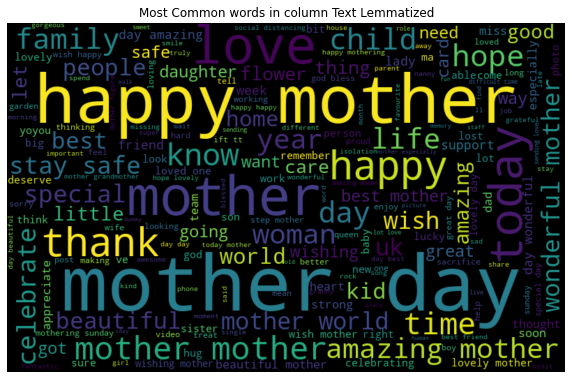

In [ ]:
# Visualizing all the words in column "text_lemmatized" in our data using the wordcloud plot.
all_words = ' '.join([text for text in combine_df['text_lemmatized']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Text Lemmatized")
plt.show()

**A) Most common words in positive texts**

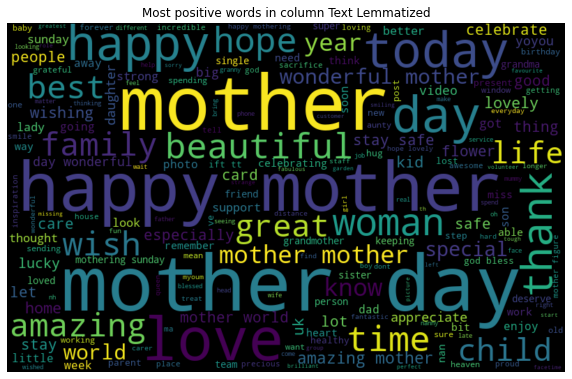

In [ ]:
#Visualizing all the positive words in column "text_lemmatized" in our data using the wordcloud plot.
positive_words =' '.join([text for text in combine_df['text_lemmatized'][combine_df['sentiment_class'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most positive words in column Text Lemmatized")
plt.show()

**B) Most common words in neutral texts**

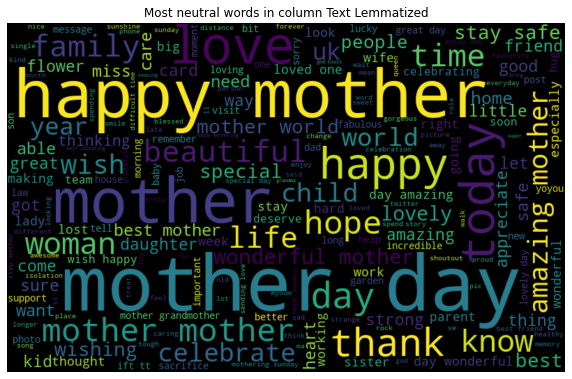

In [ ]:
#Visualizing all all the neutral words in column "text_lemmatized" in our data using the wordcloud plot.
normal_words =' '.join([text for text in combine_df['text_lemmatized'][combine_df['sentiment_class'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most neutral words in column Text Lemmatized")
plt.show()

**C) Most common words in negative texts**

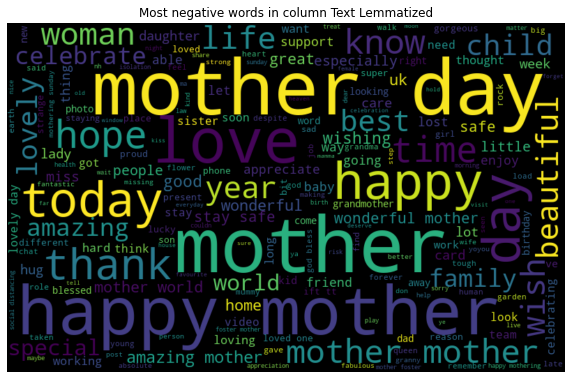

In [ ]:
#Visualizing all the negative words in column "text_lemmatized" in our data using the wordcloud plot.
negative_words =' '.join([text for text in combine_df['text_lemmatized'][combine_df['sentiment_class'] == -1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most negative words in column Text Lemmatized")
plt.show()

### Extracting Features from Cleaned Tweets

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer



cv = CountVectorizer(binary=True,ngram_range=(1,1),max_features=None)

#Count vectorizer for bigrams
# cv2 = CountVectorizer(binary=True,ngram_range=(1,2),max_features=None)

#Count vectorizer for trigrams
# cv3 = CountVectorizer(binary=True,ngram_range=(1,3),max_features=None)

#TFIDF vectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf_vectorizer = TfidfVectorizer(max_features=3000, stop_words=None)
# tfidf_vectorizer
# tfidf_lemm = tfidf_vectorizer.fit_transform(combine_df['text_lemmatized'])
# # tfidf_lemm

# X = tfidf_lemm[:3235]
# X_test = tfidf_lemm[3235:]


## SMOTE IMPLEMENTATION
# from imblearn.over_sampling import *
	
# over = SMOTE(sampling_strategy=0.1)
# under = RandomUnderSampler(sampling_strategy='majority',random_state=42)
# X, y = under.fit_resample(X, y_train)


# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X, y = oversample.fit_resample(combine_df['text_lemmatized'][:3235 ], combine_df['sentiment_class'][:3235])

# oversample = BorderlineSMOTE()
# X, y = oversample.fit_resample(X, y_train)

# from imblearn.over_sampling import SVMSMOTE
# oversample = SVMSMOTE()
# X, y = oversample.fit_resample(X, y_train)


# from imblearn.over_sampling import ADASYN
# oversample = ADASYN()
# X, y = oversample.fit_resample(X, y_train)



# cv2.fit(combine_df['text_lemmatized'][:3235 ])
# X['two'] = cv2.transform(combine_df['text_lemmatized'][:3235 ])
# y_train = combine_df['sentiment_class'][:3235 ]
# X_test['two'] = cv2.transform(combine_df['text_lemmatized'][3235:])



# cv3.fit(combine_df['text_lemmatized'][:3235 ])
# X['three'] = cv3.transform(combine_df['text_lemmatized'][:3235 ])
# y_train = combine_df['sentiment_class'][:3235 ]
# X_test['three'] = c3.transform(combine_df['text_lemmatized'][3235:])



cv.fit(combine_df['text_lemmatized'][:3235 ])
X = cv.transform(combine_df['text_lemmatized'][:3235 ])
y = combine_df['sentiment_class'][:3235 ]
X_test = cv.transform(combine_df['text_lemmatized'][3235:])

### Model Building: Text Sentiment Classification

##### XGBOOST Classifier

In [ ]:

# from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_val, y_train, y_val = train_test_split( X,  y, train_size = 0.9,random_state =42)



xgb=xgb.XGBClassifier( learning_rate =0.05,
 n_estimators=550,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 nthread=5,
 scale_pos_weight=1,
 seed=27,reg_alpha =0.01
 )

xgb.fit(X_train,y_train)

# lr  = RandomForestClassifier(n_estimators=500,max_depth=4,random_state=42)

print(classification_report(y_val, xgb.predict(X_val)))

predictions_xgb = xgb.predict(X_test)
A1 = f1_score(y_val, xgb.predict(X_val),average='weighted') # calculating f1 score
print(A1)
x_xgb = pd.DataFrame({'id':combine_df['id'][3235:],'sentiment_class':predictions_xgb})
x_xgb.sentiment_class.value_counts()

# x_xgb.to_csv('hashtag removed_xgb_all_greeting.csv',index = 0)

              precision    recall  f1-score   support

        -1.0       0.25      0.04      0.07        79
         0.0       0.52      0.92      0.66       167
         1.0       0.20      0.04      0.06        78

    accuracy                           0.49       324
   macro avg       0.32      0.33      0.26       324
weighted avg       0.38      0.49      0.37       324

0.3737484492258315


 0.0    1231
 1.0      89
-1.0      67
Name: sentiment_class, dtype: int64

#### GBM classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

from imblearn.over_sampling import *
# oversample = SMOTE()
# oversample = SVMSMOTE()98

# X_over, y_over = oversample.fit_resample(X,y)


# X_train, X_val, y_train, y_val = train_test_split( X_over, y_over, train_size = 0.8,random_state =42)

X_train, X_val, y_train, y_val = train_test_split( X, y, train_size = 0.9,random_state =42)

model= GradientBoostingClassifier(n_estimators=900,n_iter_no_change=100,learning_rate=0.3,random_state=42,max_depth=2,subsample=0.7)
# model= GradientBoostingClassifier(n_estimators=100,learning_rate=0.3,random_state=42,max_depth=2,subsample=0.7,min_samples_split=3,min_weight_fraction_leaf=0.1,min_samples_leaf=1)

model.fit(X_train, y_train)

print(classification_report(y_val, model.predict(X_val)))

predictions_gbm = model.predict(X_test)
A1 = f1_score(y_val, model.predict(X_val),average='weighted') # calculating f1 score
print(A1)
x_gbm = pd.DataFrame({'id':combine_df['id'][3235:],'sentiment_class':predictions_gbm})
print(x_gbm.sentiment_class.value_counts())

x_gbm.to_csv('hashtag removed_gbm_all_greeting.csv',index = 0)


print(model.score(X_val,y_val))
# 0.81621621621621621

# best
# X_train, X_val, y_train, y_val = train_test_split( X, y, train_size = 0.9,random_state =42)
# model= GradientBoostingClassifier(n_estimators=1500,n_iter_no_change=100,learning_rate=0.3,random_state=42,max_depth=2,subsample=0.7)

              precision    recall  f1-score   support

        -1.0       0.28      0.09      0.13        79
         0.0       0.52      0.83      0.64       167
         1.0       0.30      0.13      0.18        78

    accuracy                           0.48       324
   macro avg       0.37      0.35      0.32       324
weighted avg       0.41      0.48      0.40       324

0.4047429209573166
 0.0    1127
 1.0     132
-1.0     128
Name: sentiment_class, dtype: int64
0.4783950617283951


#### AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

cv.fit(combine_df['text_lemmatized'][:3235 ])
X = cv.transform(combine_df['text_lemmatized'][:3235 ])
y = combine_df['sentiment_class'][:3235 ]
X_test = cv.transform(combine_df['text_lemmatized'][3235:])


X_train, X_val, y_train, y_val = train_test_split( X,  y, train_size = 0.9,random_state =42)



# for c in [0.01, 0.05, 0.25, 0.5,0.6,0.7,0.8, 1]:
# for c in [0.7]:

lr = AdaBoostClassifier(n_estimators=99,random_state=42,learning_rate=0.9)
# import lightgbm as lgb
# train_data=lgb.Dataset(X_train,label=y_train)
# #define parameters
# params = {'learning_rate':0.001}
# lr= lgb.train(params, train_data, 100) 
# y_pred=model.predict(x_test)
# lr.max_iter = 3235
lr.fit(X_train, y_train)

print ("Accuracy for ", (accuracy_score(y_val, lr.predict(X_val))))
print(classification_report(y_val, lr.predict(X_val)))
A1 = f1_score(y_val, lr.predict(X_val),average='weighted') # calculating f1 score
print(A1)
predictions_ada = lr.predict(X_test)
x_lr = pd.DataFrame({'id':combine_df['id'][3235:],'sentiment_class':predictions_ada})
print(x_lr.sentiment_class.value_counts())

# x_lr.to_csv('hashtag removed_abc_all_greeting.csv',index = 0)



Accuracy for  0.49691358024691357
              precision    recall  f1-score   support

        -1.0       0.36      0.06      0.11        79
         0.0       0.52      0.89      0.66       167
         1.0       0.30      0.09      0.14        78

    accuracy                           0.50       324
   macro avg       0.39      0.35      0.30       324
weighted avg       0.43      0.50      0.40       324

0.39791124979055087
 0.0    1200
 1.0     115
-1.0      72
Name: sentiment_class, dtype: int64
